In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime, date

In [2]:
%matplotlib inline

In [3]:
pd.options.display.max_rows = 120

In [4]:
df = pd.read_hdf('work_visas_2005-2016.hdf','table')
df.head(3)

Number of Applications Application Category Application Type  \
Month Decided                                                                 
2006-11-01                          2           Group Visa             Work   
2007-11-01                          4           Group Visa             Work   
2007-12-01                          1           Group Visa             Work   

                         Application Criteria Application Stream  \
Month Decided                                                      
2006-11-01     Crew of foreign fishing vessel               Work   
2007-11-01     Crew of foreign fishing vessel               Work   
2007-12-01     Crew of foreign fishing vessel               Work   

              Application Substream Branch Location Decision Type  \
Month Decided                                                       
2006-11-01                     Crew        Offshore      Approved   
2007-11-01                     Crew        Offshore      Approved   
2007-12-01                     Crew        Offshore      Approved   

                 Job Offer?                    Applicant Type    ...      \
Month Decided                                                    ...       
2006-11-01     No Job Offer  Principal Applicant/ Application    ...       
2007-11-01     No Job Offer  Principal Applicant/ Application    ...       
2007-12-01     No Job Offer  Principal Applicant/ Application    ...       

              Gender Financial Year Decided      Occupation  \
Month Decided                                                 
2006-11-01      Male                2006/07  (not recorded)   
2007-11-01      Male                2007/08  (not recorded)   
2007-12-01      Male                2007/08  (not recorded)   

              Occupation Standard Standard Major Group  \
Month Decided                                            
2006-11-01                    NaN       (not recorded)   
2007-11-01                    NaN       (not recorded)   
2007-12-01                    NaN       (not recorded)   

              Standard Submajor Group Standard Minor Group  \
Month Decided                                                
2006-11-01             (not recorded)       (not recorded)   
2007-11-01             (not recorded)       (not recorded)   
2007-12-01             (not recorded)       (not recorded)   

              Standard Unit Group     Region     Period  
Month Decided                                            
2006-11-01         (not recorded)  (unknown)  01JUL2010  
2007-11-01         (not recorded)  (unknown)  01JUL2010  
2007-12-01         (not recorded)  (unknown)  01JUL2010  

[3 rows x 22 columns]

In [5]:
df.groupby('Application Category').sum()

Number of Applications
Application Category                        
Group Visa                               289
Permit                                323645
Visa                                 1573258

In [6]:
df.groupby('Application Type').sum()

Number of Applications
Application Type                        
Limited                            80171
Visitor's                             67
Work                             1816954

**Limited** Visas are often granted to people that have a potential risk of remaining in New Zealand unlawfully after their visa expires. It is Immigration New Zealand's (INZ) way of giving you an opportunity to come to New Zealand for an express purpose even when they see potential risks within your application.

In [7]:
df1=df.groupby('Standard Major Group').sum().sort_values('Number of Applications')
df1

Number of Applications
Standard Major Group                                                      
Response Outside Scope/Not Stated                                      278
Elementary Occupations (incl Residuals)                               2877
Clerks                                                                2963
Plant and Machine Operators and Assemblers                            7422
Responses outside of the current definition of ...                    7531
Agriculture and Fishery Workers                                       8498
Trades Workers                                                        8889
Legislators, Administrators and Managers                              9261
Machinery Operators and Drivers                                      15328
Technicians and Associate Professionals                              16231
Sales Workers                                                        17639
Clerical and Administrative Workers                                  18681
Service and Sales Workers                                            22364
Labourers                                                            46650
Managers                                                             75281
Community and Personal Service Workers                               88090
Technicians and Trades Workers                                      115775
Professionals                                                       160923
(not recorded)                                                     1272511

In [8]:
df1.drop('(not recorded)',inplace=True)

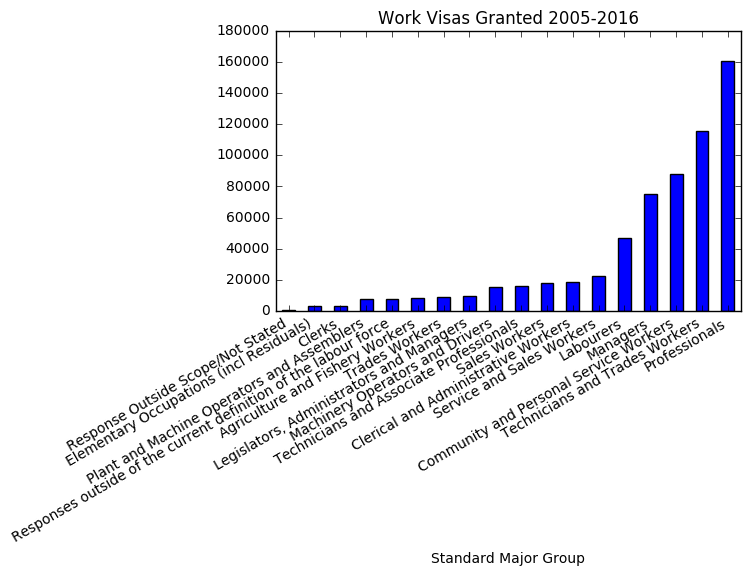

In [9]:
df1.plot(kind='bar')
fig = plt.gcf()
ax=plt.gca()
ax.legend().remove()
fig.autofmt_xdate()
plt.title("Work Visas Granted 2005-2016")


In [10]:
df1=df.groupby(['Standard Major Group', pd.Grouper(freq='A')]).sum()
#df1.drop('(not recorded)', axis=0, inplace=True)
df1

Number of Applications
Standard Major Group                               Month Decided                        
(not recorded)                                     2006-12-31                      49490
                                                   2007-12-31                     111029
                                                   2008-12-31                     119645
                                                   2009-12-31                     118173
                                                   2010-12-31                     113575
                                                   2011-12-31                     105249
                                                   2012-12-31                     104334
                                                   2013-12-31                     107509
                                                   2014-12-31                     116680
                                                   2015-12-31                     130661
                                                   2016-12-31                     147405
                                                   2017-12-31                      48761
Agriculture and Fishery Workers                    2006-12-31                       1807
                                                   2007-12-31                       5742
                                                   2008-12-31                        949
Clerical and Administrative Workers                2008-12-31                       2037
                                                   2009-12-31                       2152
                                                   2010-12-31                       1905
                                                   2011-12-31                       1687
                                                   2012-12-31                       1588
                                                   2013-12-31                       1698
                                                   2014-12-31                       1874
                                                   2015-12-31                       2190
                                                   2016-12-31                       2567
                                                   2017-12-31                        983
Clerks                                             2006-12-31                        840
                                                   2007-12-31                       1863
                                                   2008-12-31                        260
Community and Personal Service Workers             2008-12-31                       8599
                                                   2009-12-31                       8849
                                                   2010-12-31                       9403
                                                   2011-12-31                       8264
                                                   2012-12-31                       8041
                                                   2013-12-31                       8332
                                                   2014-12-31                       9730
                                                   2015-12-31                      10779
                                                   2016-12-31                      12346
                                                   2017-12-31                       3747
Elementary Occupations (incl Residuals)            2006-12-31                        793
                                                   2007-12-31                       1816
                                                   2008-12-31                        268
Labourers                                          2008-12-31                       5476
                                                   2009-12-31                       4555
                                                   2010-12-31

In [11]:
df1.loc['Technicians and Trades Workers'].iloc[[0,2]].index.year

array([2007, 2009])

In [12]:
df1=df.groupby('Standard Major Group').sum().sort_values('Number of Applications')
df1

Number of Applications
Standard Major Group                                                      
Response Outside Scope/Not Stated                                      278
Elementary Occupations (incl Residuals)                               2877
Clerks                                                                2963
Plant and Machine Operators and Assemblers                            7422
Responses outside of the current definition of ...                    7531
Agriculture and Fishery Workers                                       8498
Trades Workers                                                        8889
Legislators, Administrators and Managers                              9261
Machinery Operators and Drivers                                      15328
Technicians and Associate Professionals                              16231
Sales Workers                                                        17639
Clerical and Administrative Workers                                  18681
Service and Sales Workers                                            22364
Labourers                                                            46650
Managers                                                             75281
Community and Personal Service Workers                               88090
Technicians and Trades Workers                                      115775
Professionals                                                       160923
(not recorded)                                                     1272511

In [13]:


def dateGroupData(dataset, date_ranges, exclusions=[]):
    newlist = []
    for l in dataset.index.get_level_values(0).tolist():
        if l not in newlist and l not in exclusions:
            newlist.append(l)
    d = []

    for l in newlist:
        cum = np.zeros(len(date_ranges), np.uint32)
        for idx, ranges in enumerate(date_ranges):
            y1,y2 = ranges
            for ix, s in dataset.loc[l].iterrows():
                #print (ix.year,s)
                if y1 <= ix.year <= y2:
                    cum[idx]+= (s.iat[0])
        d.append((l,cum))

    ylist = sorted (d, key=lambda x:sum(x[1]))

    vals = np.zeros((len(date_ranges),len(newlist)),np.uint32 )
    
    xlabels=[]
    for idx, elmts in enumerate(ylist):
        xlabels.append(elmts[0])
        for idx2, el in enumerate(elmts[1]):
            vals[idx2][idx]=el
    #print (xlabels)
    return (xlabels, vals)



In [14]:
np.array((2,3,0))+np.array((1,2,4))

array([3, 5, 4])

In [15]:
def colourRange(colours, n, skipFirst=False):
    start, end = colours
    val = list(start)
    diff = [float(y-x)/(n-1) for x,y in zip(start, end)]
    if not skipFirst:
        yield val
    for ii in range(0, n-1):
        for jj in range(0,3):
            val[jj] += diff[jj]
        yield val

from itertools import izip



def stackedTimeBars(plt, vals, colors, width=0.85):
    ind = np.arange(1,len(vals[0])+1)    # the x locations for the groups
    #width = 0.3       # the width of the bars: can also be len(x) sequence
    p1 = plt.bar(ind, vals[0], width, color=colors[0])
    ps = [p1]
    for ii, clr in izip(range(0,len(vals)-1), colourRange(colors,len(vals),skipFirst=True)):
        bottoms = np.copy(vals[0])
        for jj in range(0,ii):
            bottoms += vals[jj+1]
        p = plt.bar(ind, vals[ii+1], width, bottom=bottoms,  color=clr)
        ps.append(p)
    return ps



In [39]:
df1=df.groupby(['Standard Major Group', pd.Grouper(freq='A')]).sum()
df1.rename(index={'Service and Sales Workers':'Sales Workers'}, inplace=True)
df1.rename(index={'Trades Workers':'Technicians and Trades Workers'}, inplace=True)
df1

Number of Applications
Standard Major Group                               Month Decided                        
(not recorded)                                     2006-12-31                      49490
                                                   2007-12-31                     111029
                                                   2008-12-31                     119645
                                                   2009-12-31                     118173
                                                   2010-12-31                     113575
                                                   2011-12-31                     105249
                                                   2012-12-31                     104334
                                                   2013-12-31                     107509
                                                   2014-12-31                     116680
                                                   2015-12-31                     130661
                                                   2016-12-31                     147405
                                                   2017-12-31                      48761
Agriculture and Fishery Workers                    2006-12-31                       1807
                                                   2007-12-31                       5742
                                                   2008-12-31                        949
Clerical and Administrative Workers                2008-12-31                       2037
                                                   2009-12-31                       2152
                                                   2010-12-31                       1905
                                                   2011-12-31                       1687
                                                   2012-12-31                       1588
                                                   2013-12-31                       1698
                                                   2014-12-31                       1874
                                                   2015-12-31                       2190
                                                   2016-12-31                       2567
                                                   2017-12-31                        983
Clerks                                             2006-12-31                        840
                                                   2007-12-31                       1863
                                                   2008-12-31                        260
Community and Personal Service Workers             2008-12-31                       8599
                                                   2009-12-31                       8849
                                                   2010-12-31                       9403
                                                   2011-12-31                       8264
                                                   2012-12-31                       8041
                                                   2013-12-31                       8332
                                                   2014-12-31                       9730
                                                   2015-12-31                      10779
                                                   2016-12-31                      12346
                                                   2017-12-31                       3747
Elementary Occupations (incl Residuals)            2006-12-31                        793
                                                   2007-12-31                       1816
                                                   2008-12-31                        268
Labourers                                          2008-12-31                       5476
                                                   2009-12-31                       4555
                                                   2010-12-31

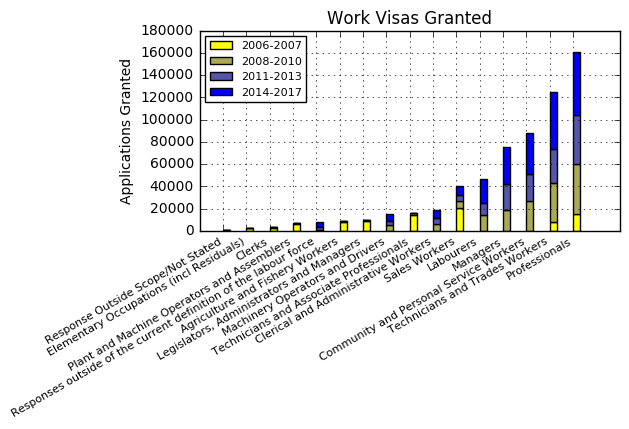

In [41]:


def stackedWorkVisasDatePlot(title, dataset, filename, left_adjust=0, bottom_adjust=0.4):
    dateranges=((2006,2007),(2008,2010),(2011,2013),(2014,2017))
    xlabels, vals = (dateGroupData(dataset, dateranges, ['(not recorded)']))
    colors = [(1,1,0), (0,0,1)]
    N = len(xlabels)
    ps = stackedTimeBars(plt, vals, colors, width=0.3)
    plt.ylabel('Applications Granted')
    plt.title(title)
    plt.xticks(np.arange(1, N+1), xlabels)
    #plt.yticks(np.arange(0, 81, 10))
    legend_strs = []
    for ds,de in dateranges:
        legend_strs.append("{}-{}".format(ds,de))
    plt.legend(ps, legend_strs,loc='upper left', prop={'size': 8})
    fig = plt.gcf()
    ax=plt.gca()
    fig.autofmt_xdate()
    plt.grid()
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(8)
    fig.subplots_adjust(left=0.20, bottom=0.40)
    fig.savefig(filename, transparent=False, bbox_inches='tight')

stackedWorkVisasDatePlot('Work Visas Granted', df1, 'work-visas-granted.png', left_adjust=0.2, bottom_adjust=0.4)
plt.show()

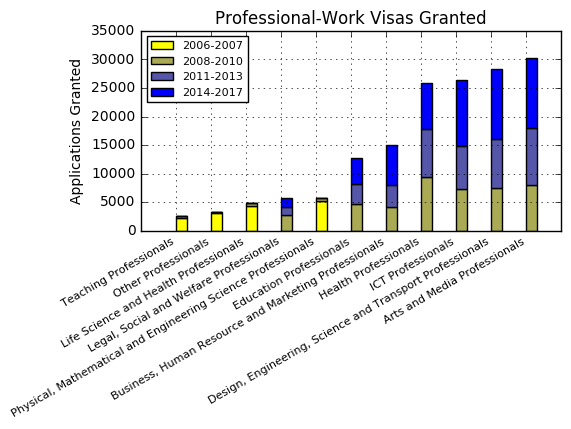

In [42]:
df1=df[df['Standard Major Group']=='Professionals'].groupby(['Standard Submajor Group', pd.Grouper(freq='A')]).sum()
stackedWorkVisasDatePlot('Professional-Work Visas Granted', df1, 'prof-work-visas-granted.png', left_adjust=0, bottom_adjust=0.4)
plt.show()


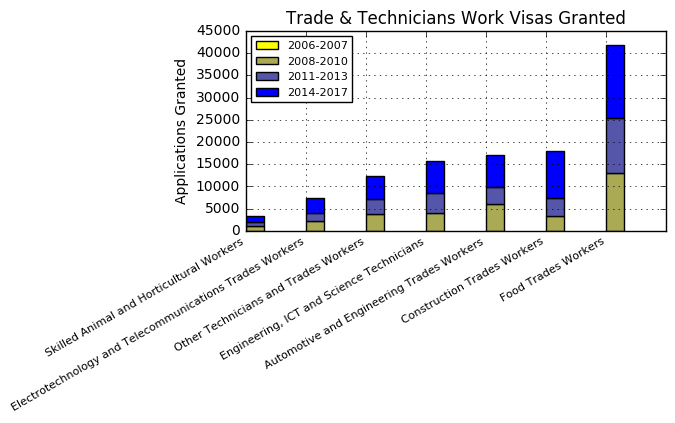

In [43]:
df1=df[df['Standard Major Group']=='Technicians and Trades Workers'].groupby(['Standard Submajor Group', pd.Grouper(freq='A')]).sum()
stackedWorkVisasDatePlot('Trade & Technicians Work Visas Granted', df1, 'trade-work-visas-granted.png', left_adjust=0, bottom_adjust=0.4)
plt.show()



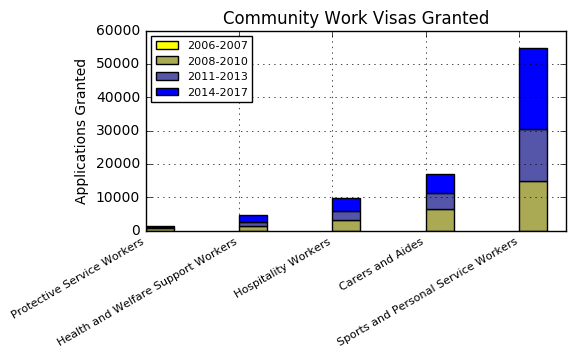

In [44]:
df1=df[df['Standard Major Group']=='Community and Personal Service Workers'].groupby(['Standard Submajor Group', pd.Grouper(freq='A')]).sum()
stackedWorkVisasDatePlot('Community Work Visas Granted', df1, 'comm-work-visas-granted.png', left_adjust=0, bottom_adjust=0.4)
plt.show()


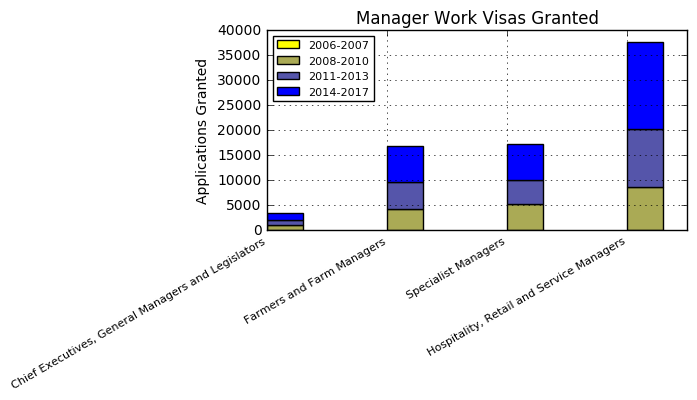

In [45]:
df1=df[df['Standard Major Group']=='Managers'].groupby(['Standard Submajor Group', pd.Grouper(freq='A')]).sum()
stackedWorkVisasDatePlot('Manager Work Visas Granted', df1, 'mgr-work-visas-granted.png', left_adjust=0, bottom_adjust=0.4)
plt.show()


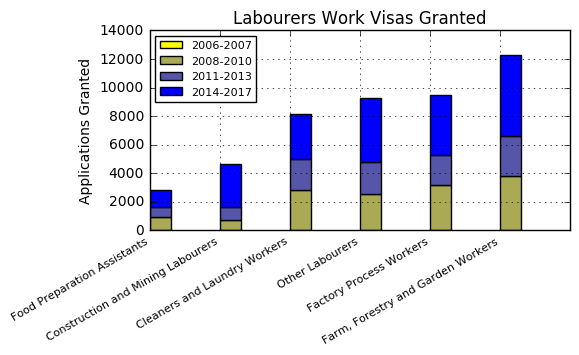

In [46]:
df1=df[df['Standard Major Group']=='Labourers'].groupby(['Standard Submajor Group', pd.Grouper(freq='A')]).sum()
stackedWorkVisasDatePlot('Labourers Work Visas Granted', df1, 'lab-work-visas-granted.png', left_adjust=0, bottom_adjust=0.4)
plt.show()


In [41]:
df1=df.groupby([pd.Grouper(freq='M')]).sum()
df1

Number of Applications
Month Decided                        
2006-07-31                      12220
2006-08-31                      14144
2006-09-30                      13377
2006-10-31                      12903
2006-11-30                      12936
2006-12-31                      10238
2007-01-31                      12577
2007-02-28                      11619
2007-03-31                      15256
2007-04-30                      13663
2007-05-31                      16027
2007-06-30                      13954
2007-07-31                      14878
2007-08-31                      14795
2007-09-30                      13818
2007-10-31                      16074
2007-11-30                      14588
2007-12-31                      12833
2008-01-31                      14701
2008-02-29                      15219
2008-03-31                      15638
2008-04-30                      16946
2008-05-31                      15903
2008-06-30                      14178
2008-07-31                      15251
2008-08-31                      13307
2008-09-30                      13787
2008-10-31                      15734
2008-11-30                      14518
2008-12-31                      12939
...                               ...
2014-11-30                      14721
2014-12-31                      11446
2015-01-31                      14888
2015-02-28                      14643
2015-03-31                      18238
2015-04-30                      15448
2015-05-31                      15908
2015-06-30                      15819
2015-07-31                      17218
2015-08-31                      17060
2015-09-30                      18267
2015-10-31                      20115
2015-11-30                      16318
2015-12-31                      12539
2016-01-31                      15701
2016-02-29                      17095
2016-03-31                      20169
2016-04-30                      18239
2016-05-31                      18626
2016-06-30                      18222
2016-07-31                      17885
2016-08-31                      20918
2016-09-30                      21308
2016-10-31                      20072
2016-11-30                      19106
2016-12-31                      13104
2017-01-31                      16901
2017-02-28                      18523
2017-03-31                      23457
2017-04-30                      14908

[130 rows x 1 columns]

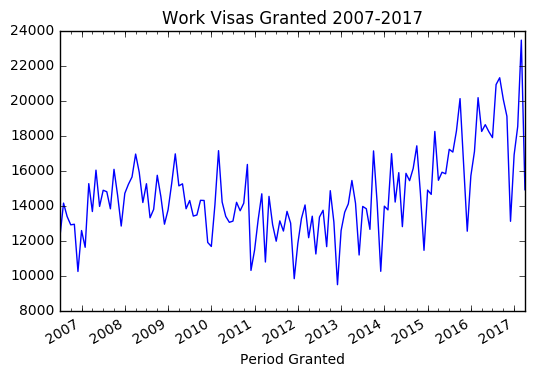

In [42]:
df1.plot()
fig = plt.gcf()
ax=plt.gca()
ax.legend().remove()
fig.autofmt_xdate()
plt.title("Work Visas Granted 2007-2017")
plt.xlabel("Period Granted")

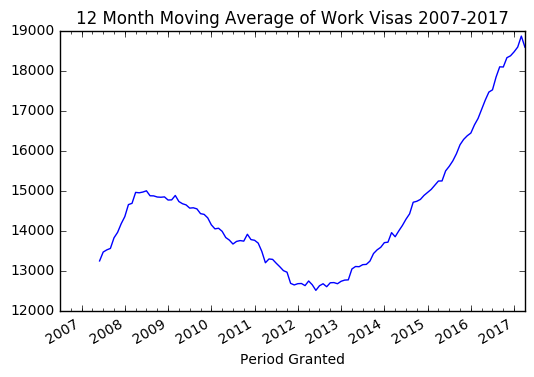

In [44]:
r = df1.rolling(window=12)
r.mean().plot()
fig = plt.gcf()
ax=plt.gca()
ax.legend().remove()
fig.autofmt_xdate()
plt.title("12 Month Moving Average of Work Visas 2007-2017")
plt.xlabel('Period Granted')

In [15]:
df[df['Standard Major Group']=='Professionals'].groupby('Standard Submajor Group').sum().sort_values('Number of Applications')

Number of Applications
Standard Submajor Group                                                   
Teaching Professionals                                                2607
Other Professionals                                                   3382
Life Science and Health Professionals                                 4798
Legal, Social and Welfare Professionals                               5743
Physical, Mathematical and Engineering Science ...                    5827
Education Professionals                                              12800
Business, Human Resource and Marketing Professi...                   14951
Health Professionals                                                 25818
ICT Professionals                                                    26423
Design, Engineering, Science and Transport Prof...                   28263
Arts and Media Professionals                                         30311

In [16]:
df[df['Standard Submajor Group']=='ICT Professionals'].groupby('Standard Minor Group').sum().sort_values('Number of Applications')

Number of Applications
Standard Minor Group                                                      
Database and Systems Administrators, and ICT Se...                    1525
ICT Network and Support Professionals                                 5714
Business and Systems Analysts, and Programmers                       19184

In [18]:
df[df['Standard Minor Group']=='Business and Systems Analysts, and Programmers'].groupby('Standard Unit Group').sum().sort_values('Number of Applications')

Number of Applications
Standard Unit Group                                              
Multimedia Specialists and Web Developers                    3875
ICT Business and Systems Analysts                            3968
Software and Applications Programmers                       11341

In [17]:
df[df['Standard Major Group']=='Trades Workers'].groupby('Standard Submajor Group').sum().sort_values('Number of Applications')

Number of Applications
Standard Submajor Group                                       
Precision Trades Workers                                   356
Other Craft and Related Trades Workers                    1322
Building Trades Workers                                   3566
Metal and Machinery Trades Workers                        3645

In [19]:
df[df['Standard Major Group']=='Technicians and Trades Workers'].groupby('Standard Submajor Group').sum().sort_values('Number of Applications')

Number of Applications
Standard Submajor Group                                                   
Skilled Animal and Horticultural Workers                              3269
Electrotechnology and Telecommunications Trades...                    7322
Other Technicians and Trades Workers                                 12397
Engineering, ICT and Science Technicians                             15802
Automotive and Engineering Trades Workers                            17179
Construction Trades Workers                                          17905
Food Trades Workers                                                  41901

In [8]:
not_recorded = df[df['Standard Major Group'] == '(not recorded)']

In [43]:
not_recorded.tail(3)

Number of Applications Application Category Application Type  \
Month Decided                                                                 
2011-05-01                          1                 Visa             Work   
2011-12-01                          1                 Visa             Work   
2014-10-01                          1                 Visa             Work   

                      Application Criteria Application Stream  \
Month Decided                                                   
2011-05-01     Work experience for student               Work   
2011-12-01     Work experience for student               Work   
2014-10-01     Work experience for student               Work   

              Application Substream Branch Location Decision Type  \
Month Decided                                                       
2011-05-01                    Other         Onshore      Approved   
2011-12-01                    Other         Onshore      Approved   
2014-10-01                    Other         Onshore      Approved   

                 Job Offer?                    Applicant Type    ...      \
Month Decided                                                    ...       
2011-05-01     No Job Offer  Principal Applicant/ Application    ...       
2011-12-01     No Job Offer  Principal Applicant/ Application    ...       
2014-10-01     No Job Offer  Principal Applicant/ Application    ...       

               Gender Financial Year Decided      Occupation  \
Month Decided                                                  
2011-05-01       Male                2010/11  (not recorded)   
2011-12-01     Female                2011/12  (not recorded)   
2014-10-01       Male                2014/15  (not recorded)   

              Occupation Standard Standard Major Group  \
Month Decided                                            
2011-05-01                    NaN       (not recorded)   
2011-12-01                    NaN       (not recorded)   
2014-10-01                    NaN       (not recorded)   

              Standard Submajor Group Standard Minor Group  \
Month Decided                                                
2011-05-01             (not recorded)       (not recorded)   
2011-12-01             (not recorded)       (not recorded)   
2014-10-01             (not recorded)       (not recorded)   

              Standard Unit Group     Region     Period  
Month Decided                                            
2011-05-01         (not recorded)  (unknown)  01JUL2010  
2011-12-01         (not recorded)  (unknown)  01JUL2010  
2014-10-01         (not recorded)  (unknown)  01JUL2010  

[3 rows x 22 columns]

In [45]:
df2=not_recorded.groupby('Application Criteria').sum().sort_values('Number of Applications', ascending=False)
df2.head(10)

Number of Applications
Application Criteria                                         
Partnership                                            165363
Partner of a worker                                    156119
Graduate Job Search                                    121425
United Kingdom Working Holiday Scheme                  116095
Germany Working Holiday Scheme                         104843
Recognised Seasonal Employer                            80086
France Working Holiday Scheme                           55597
United States Working Holiday Scheme                    33271
Section 61                                              31713
Specific Purpose or event                               24209

In [50]:
major_cols=df2.index.tolist()[0:10]
major_cols

['Partnership',
 'Partner of a worker',
 'Graduate Job Search',
 'United Kingdom Working Holiday Scheme',
 'Germany Working Holiday Scheme',
 'Recognised Seasonal Employer',
 'France Working Holiday Scheme',
 'United States Working Holiday Scheme',
 'Section 61',
 'Specific Purpose or event']

In [57]:
not_recorded[not_recorded['Application Criteria'].isin(major_cols)].groupby(['Application Criteria',pd.Grouper(freq='A')]).sum()

Number of Applications
Application Criteria                  Month Decided                        
France Working Holiday Scheme         2006-12-31                        637
                                      2007-12-31                       1632
                                      2008-12-31                       2221
                                      2009-12-31                       3329
                                      2010-12-31                       3325
                                      2011-12-31                       3995
                                      2012-12-31                       4303
                                      2013-12-31                       5662
                                      2014-12-31                       8215
                                      2015-12-31                       9167
                                      2016-12-31                      10182
                                      2017-12-31                       2929
Germany Working Holiday Scheme        2006-12-31                       2860
                                      2007-12-31                       5677
                                      2008-12-31                       6561
                                      2009-12-31                       7199
                                      2010-12-31                       7139
                                      2011-12-31                       8437
                                      2012-12-31                       9077
                                      2013-12-31                      11715
                                      2014-12-31                      12968
                                      2015-12-31                      14720
                                      2016-12-31                      15538
                                      2017-12-31                       2952
Graduate Job Search                   2006-12-31                       3695
                                      2007-12-31                       9246
                                      2008-12-31                      10893
                                      2009-12-31                      11202
                                      2010-12-31                      11952
                                      2011-12-31                       9324
                                      2012-12-31                       9208
                                      2013-12-31                       7761
                                      2014-12-31                       8096
                                      2015-12-31                      12859
                                      2016-12-31                      19356
                                      2017-12-31                       7833
Partner of a worker                   2006-12-31                       5742
                                      2007-12-31                      14266
                                      2008-12-31                      16643
                                      2009-12-31                      15542
                                      2010-12-31                      13835
                                      2011-12-31                      11663
                                      2012-12-31                      11891
                                      2013-12-31                      12437
                                      2014-12-31                      13945
                                      2015-12-31                      15425
                                      2016-12-31                      18302
                                      2017-12-31                       6428
Partnership                           2006-12-31                       8193
                                      2007-12-31                      16627
                                      2008-12-31                      16187
                         

In [60]:
not_recorded.groupby('Standard Submajor Group').sum()

Number of Applications
Standard Submajor Group                        
(not recorded)                          1272511

In [61]:
df1 = df.groupby(['Standard Major Group',pd.Grouper(freq='A')]).sum()
df1

Number of Applications
Standard Major Group                               Month Decided                        
(not recorded)                                     2006-12-31                      49490
                                                   2007-12-31                     111029
                                                   2008-12-31                     119645
                                                   2009-12-31                     118173
                                                   2010-12-31                     113575
                                                   2011-12-31                     105249
                                                   2012-12-31                     104334
                                                   2013-12-31                     107509
                                                   2014-12-31                     116680
                                                   2015-12-31                     130661
                                                   2016-12-31                     147405
                                                   2017-12-31                      48761
Agriculture and Fishery Workers                    2006-12-31                       1807
                                                   2007-12-31                       5742
                                                   2008-12-31                        949
Clerical and Administrative Workers                2008-12-31                       2037
                                                   2009-12-31                       2152
                                                   2010-12-31                       1905
                                                   2011-12-31                       1687
                                                   2012-12-31                       1588
                                                   2013-12-31                       1698
                                                   2014-12-31                       1874
                                                   2015-12-31                       2190
                                                   2016-12-31                       2567
                                                   2017-12-31                        983
Clerks                                             2006-12-31                        840
                                                   2007-12-31                       1863
                                                   2008-12-31                        260
Community and Personal Service Workers             2008-12-31                       8599
                                                   2009-12-31                       8849
                                                   2010-12-31                       9403
                                                   2011-12-31                       8264
                                                   2012-12-31                       8041
                                                   2013-12-31                       8332
                                                   2014-12-31                       9730
                                                   2015-12-31                      10779
                                                   2016-12-31                      12346
                                                   2017-12-31                       3747
Elementary Occupations (incl Residuals)            2006-12-31                        793
                                                   2007-12-31                       1816
                                                   2008-12-31                        268
Labourers                                          2008-12-31                       5476
                                                   2009-12-31                       4555
                                                   2010-12-31

In [12]:
df1.columns

Index([u'Number of Applications'], dtype='object')

In [13]:
df1.index

MultiIndex(levels=[[u'(not recorded)', u'Agriculture and Fishery Workers', u'Clerical and Administrative Workers', u'Clerks', u'Community and Personal Service Workers', u'Elementary Occupations (incl Residuals)', u'Labourers', u'Legislators, Administrators and Managers', u'Machinery Operators and Drivers', u'Managers', u'Plant and Machine Operators and Assemblers', u'Professionals', u'Response Outside Scope/Not Stated', u'Responses outside of the current definition of the labour force', u'Sales Workers', u'Service and Sales Workers', u'Technicians and Associate Professionals', u'Technicians and Trades Workers', u'Trades Workers'], [2006-12-31 00:00:00, 2007-12-31 00:00:00, 2008-12-31 00:00:00, 2009-12-31 00:00:00, 2010-12-31 00:00:00, 2011-12-31 00:00:00, 2012-12-31 00:00:00, 2013-12-31 00:00:00, 2014-12-31 00:00:00, 2015-12-31 00:00:00, 2016-12-31 00:00:00, 2017-12-31 00:00:00]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4,